<a href="https://colab.research.google.com/github/gnganesh99/BO-for-AutoSTM/blob/main/Analyze_DKL_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sidpy
! pip install numpy==1.23
! pip install SciFiReaders
!pip install -U gdown

import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
import sidpy
import SciFiReaders

In [58]:
# Download data

!gdown https://drive.google.com/uc?id=1vbHuYw-ynPmngVl2er3IeYDXH843yDB5

Downloading...
From: https://drive.google.com/uc?id=1vbHuYw-ynPmngVl2er3IeYDXH843yDB5
To: /content/Figure3_large_area.hf5
100% 3.21M/3.21M [00:00<00:00, 181MB/s]


Load data

In [63]:
input_file_path = r"/content/Figure3_large_area.hf5"


In [65]:
hfile = h5py.File(input_file_path, 'r+')
sidpy.hdf_utils.print_tree(hfile)

#hf.close()

/
├ Measurement_000
  ---------------
  ├ Tunneling Spectroscopy
    ----------------------
    ├ Tunneling Spectroscopy
      ----------------------
      ├ DKL_iteration
      ├ Spectroscpy_Channel
      ├ Spectroscpy_Sweep
      ├ Tunneling Spectroscopy
      ├ metadata
        --------
        ├ DKL_position
          ------------
        ├ DKL_scalar
          ----------
        ├ image_attr
          ----------
├ Measurement_001
  ---------------
  ├ STM Image
    ---------
    ├ Image
      -----
      ├ Image
      ├ a
      ├ b


STM image used for the DKL

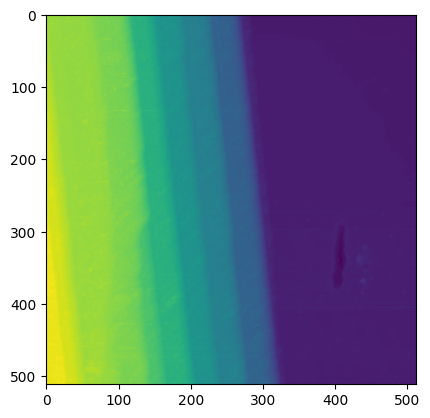

In [75]:
ds_image = hfile["Measurement_001/STM Image/Image/Image"]
ds_image = np.asarray(ds_image)
plt.imshow(ds_image)

In [82]:
# get the sidpy dataset

dr = SciFiReaders.NSIDReader(input_file_path)
dset = dr.read()[0]
print(dset.shape)   # contains 267 iterations, 4 spectroscopy channel, 121 points of bias sweep.
assert isinstance(dset, sidpy.Dataset)

(267, 4, 121)


In [112]:
# STM image attributes

image_dict = dset.metadata['image_attr']
print(f"frame_size = {image_dict['frame_size']}, pixels = {image_dict['pixels']}")


frame_size = 250, pixels = 512


Access and DKL data

In [96]:
#DKL Position

# DKL Iteration
itr = 1

# Position of DKL Acquisition
position_dict = dset.metadata['DKL_position']
print(f'DKL position =  {position_dict[str(itr)]}')


# Scalar of DKL Acquisition
scalar_dict = dset.metadata['DKL_scalar']
print(f'DKL scalar =  {scalar_dict[str(itr)]}')


DKL position =  [29.296875  73.2421875]
DKL scalar =  4.254984627627863e-09


Plot spectroscopy data

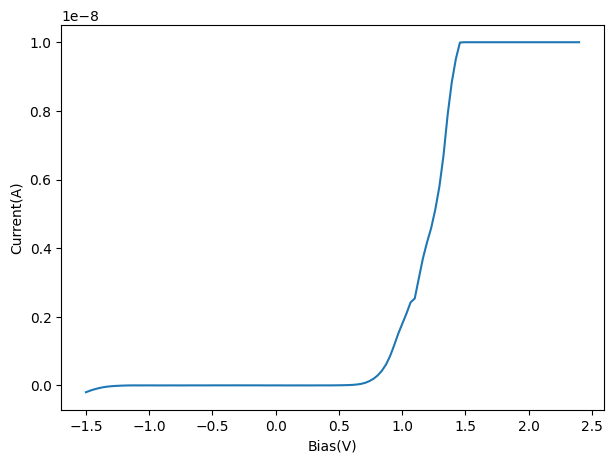

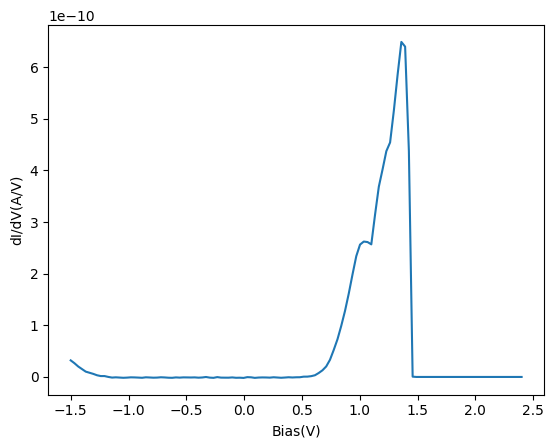

In [109]:

figure = plt.figure(figsize = (7, 5))

dataset = np.asarray(dset)

#Spectroscopy data from dataset[iteration, channel];  Channel =  0: bias, 1: current; 2: didiv(LIX); 3: LIY
bias =  dataset[itr, 0]
current = dataset[itr][1]
didv = dataset[itr][2]
#print(bias[0])

plt.plot(bias, current)
plt.xlabel('Bias(V)')
plt.ylabel('Current(A)')
plt.show()


plt.plot(bias, didv)
plt.xlabel('Bias(V)')
plt.ylabel('dI/dV(A/V)')
plt.show()